In [1]:
import pandas as pd

In [2]:
# amostra de dados aleatória do microdados
fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
dados = pd.read_csv(fonte)
dados.head()
# o resultado é um dataframe

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [3]:
dados.shape

(127380, 136)

In [4]:
dados["SG_UF_RESIDENCIA"] 
# a estrutura resultante é uma série do pandas

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [5]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
dados[["SG_UF_RESIDENCIA", "Q025"]]

,SG_UF_RESIDENCIA,Q025
0,PA,B
1,PA,B
2,PA,B
3,PA,B
4,PA,B
...,...,...
127375,MG,B
127376,BA,B
127377,BA,B
127378,BA,A


In [7]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [8]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

In [9]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

**Desafio 01:**  Proporção de inscritos por idade.

In [10]:
dados["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

In [11]:
dados_idade = dados["NU_IDADE"].value_counts().sort_index()
dados_idade

total_inscritos = len(dados["NU_IDADE"])
total_inscritos

#porcentagem de inscritos por idade
inscritos_proporcionais = (dados_idade/total_inscritos).mul(100)
inscritos_proporcionais

distribuicao_por_idade_percentual = pd.DataFrame()
distribuicao_por_idade_percentual['Idade'] = inscritos_proporcionais.index
distribuicao_por_idade_percentual['Total'] = dados_idade.values
distribuicao_por_idade_percentual['Proporção (%)'] = inscritos_proporcionais.values
distribuicao_por_idade_percentual

,Idade,Total,Proporção (%)
0,13,4,0.003140
1,14,141,0.110692
2,15,2009,1.577171
3,16,7830,6.146962
4,17,21256,16.687078
...,...,...,...
60,73,2,0.001570
61,75,2,0.001570
62,76,1,0.000785
63,77,1,0.000785


**Desafio 02:**  Descobrir de quais estados são os inscritos com 13 anos.

In [12]:
estados_alunos_13_anos = dados.query("NU_IDADE==13")['SG_UF_RESIDENCIA'].value_counts().sort_index()
estados_alunos_13_anos = pd.DataFrame(estados_alunos_13_anos).rename(columns = {'SG_UF_RESIDENCIA': 'Qtde inscritos com 13 anos'}, inplace = False)

# estados_com_13_anos  = dados.query("NU_IDADE==13")['SG_UF_RESIDENCIA'].value_counts().sort_index()
# estados_com_13_anos = pd.DataFrame(estados_com_13_anos).rename(columns = {'SG_UF_RESIDENCIA': 'Quantidade de Inscritos com 13 anos'}, inplace = False)

estados_alunos_13_anos.columns.name = 'Estado'
estados_alunos_13_anos

Estado,Qtde inscritos com 13 anos
AP,1
BA,1
MT,1
SP,1


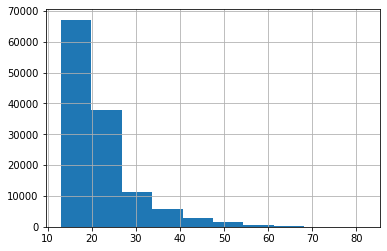

In [13]:
dados["NU_IDADE"].hist()

**Desafio 03:** Adicionar título no gráfico

Text(0.5, 1.0, 'Idade dos inscritos')

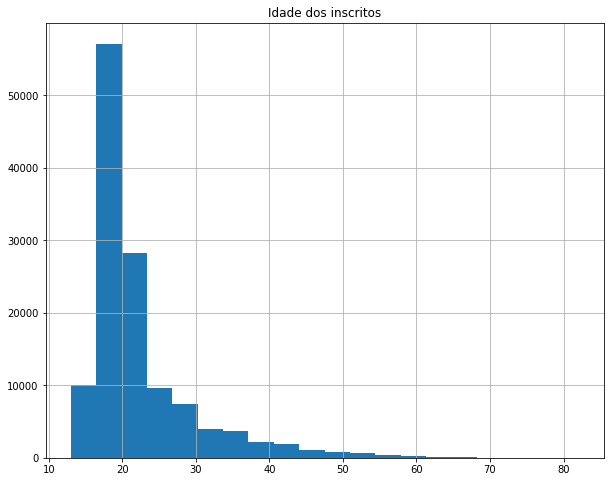

In [14]:
dados["NU_IDADE"].hist(bins = 20, figsize = (10,8)).set_title("Idade dos inscritos")
# import pylab as pl
# pl.suptitle("Dá pra passar desse jeito tbm")

In [15]:
dados["IN_TREINEIRO"]

0         1
1         0
2         0
3         0
4         1
         ..
127375    0
127376    0
127377    0
127378    0
127379    0
Name: IN_TREINEIRO, Length: 127380, dtype: int64

In [16]:
dados.query("IN_TREINEIRO == 1")["NU_IDADE"].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

**Desafio 04:** Plotar dois histogramas (um em cima do outro) das idades dos treineiros e não treineiros.

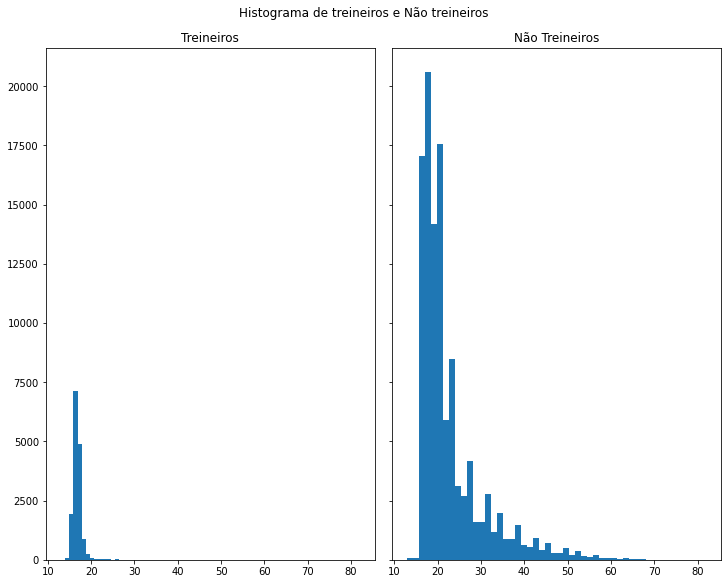

In [17]:
#subplots gera um figura e vc pode passar varios gráficos dentro dele
import matplotlib.pyplot as plt
n_bins = 50

treineiros = dados.query("IN_TREINEIRO==1")["NU_IDADE"]
nao_treineiros = dados.query("IN_TREINEIRO==0")["NU_IDADE"]
fig, axs = plt.subplots(nrows = 1,  ncols=2,  constrained_layout=True, figsize = (10,8), sharey = True, sharex = True)

fig.suptitle('Histograma de treineiros e Não treineiros')

axs[0].hist(treineiros, n_bins)
axs[0].set_title("Treineiros")

axs[1].hist(nao_treineiros, n_bins)
axs[1].set_title("Não Treineiros")

plt.show()

Apresentando os dados de treineiros e não treineiros no mesmo gráfico.

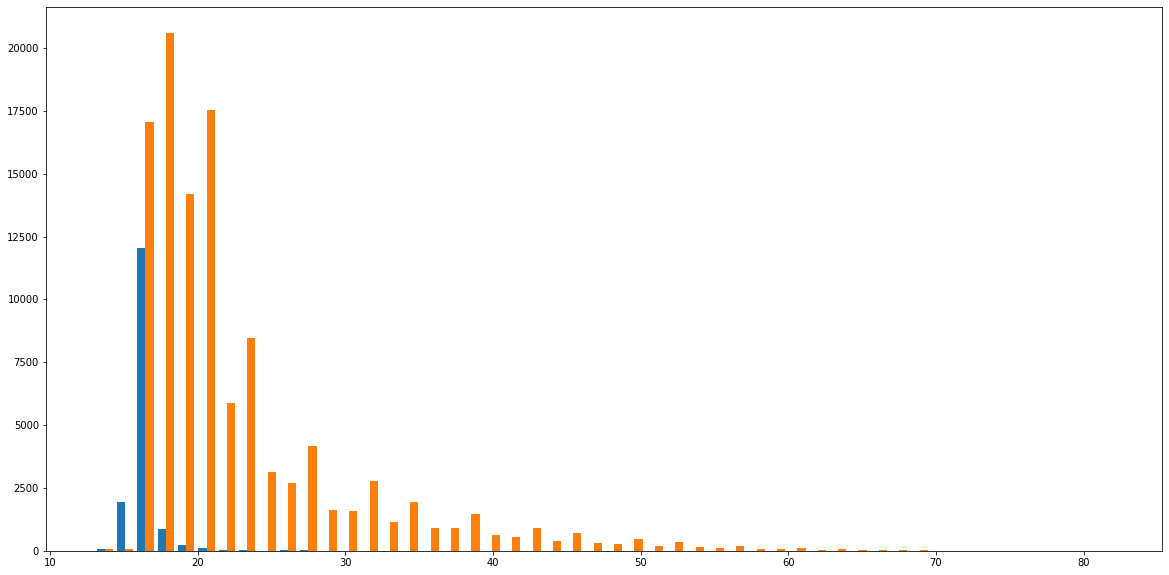

In [18]:
plt.figure(figsize = (20,10))
plt.hist([treineiros,nao_treineiros], bins = n_bins,
        label = ['Idade Treineiros', 'Idade Não Treineiros'])
plt.show()

Qual a idade máxima dos treineiros e não treineiros?



In [19]:
print(f'Idade maxima dos não treineiros = {nao_treineiros.max()}')
print(f'Idade maxima dos treineiros = {treineiros.max()}')

Idade maxima dos não treineiros = 82
Idade maxima dos treineiros = 62


Qual a porcentagem de treineiros e não treineiros? 

In [20]:
#print(f'Porcentagem de treineiros = ')
#print(f'Porcentagem de não treineiros = ')

**Desafio 05:** Comparar as distruibuições das provas em inglês e espanhol.
Dica : fazer uma query separando os dados das provas em ingles e em espanhol e depois plotar os graficos dessas duas notas separadas e verificar se tem o mesmo formato. Explorar matplotlib e brincar com visualizações.

In [21]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

notas_ingles = dados.query("TP_LINGUA==0")[provas]
notas_ingles_lc = notas_ingles['NU_NOTA_LC']

notas_espanhol = dados.query("TP_LINGUA==1")[provas]
notas_espanhol_lc = notas_espanhol['NU_NOTA_LC']

data_notas_lc_lingua = pd.DataFrame(data={'Inglês':notas_ingles_lc, 'Espanhol':notas_espanhol_lc })
data_notas_lc_lingua

,Inglês,Espanhol
0,NaN,488.6
1,NaN,375.3
2,NaN,441.0
3,NaN,551.5
4,511.2,NaN
...,...,...
127375,NaN,525.7
127376,450.3,NaN
127377,NaN,497.9
127378,NaN,517.3


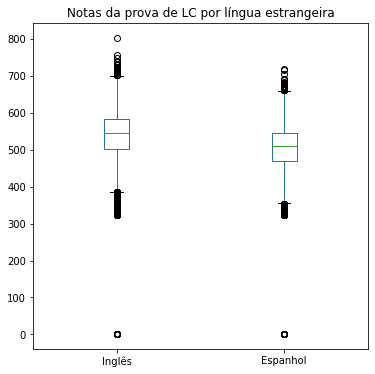

In [22]:
data_notas_lc_lingua.plot.box(figsize=(6,6),title="Notas da prova de LC por língua estrangeira");

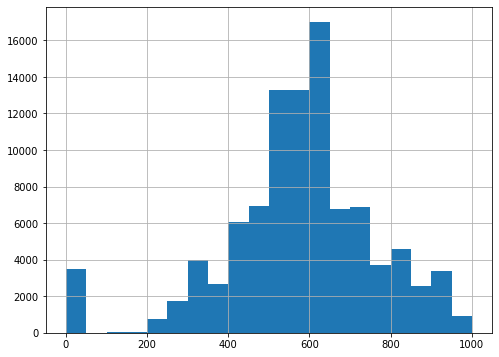

In [23]:
dados["NU_NOTA_REDACAO"].hist(bins = 20, figsize = (8, 6))

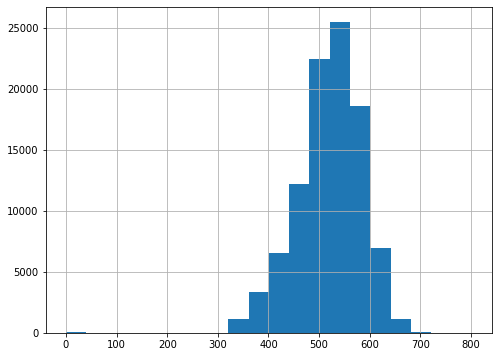

In [24]:
dados["NU_NOTA_LC"].hist(bins = 20, figsize = (8, 6))

In [25]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

In [26]:
dados["NU_NOTA_REDACAO"].std()

188.07645455749753

In [27]:
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]
dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


In [28]:
dados["NU_NOTA_LC"].quantile(0.9)
# 90% (0.9) dos alunos na amostra tiraram abaixo de 596.3 e 10% (0.1) tiraram notas acima de 596.3

596.3

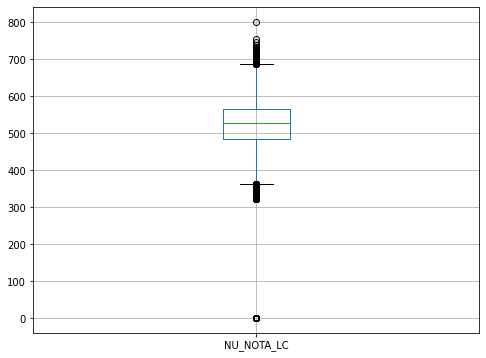

In [29]:
dados["NU_NOTA_LC"].plot.box(grid = True, figsize = (8, 6))

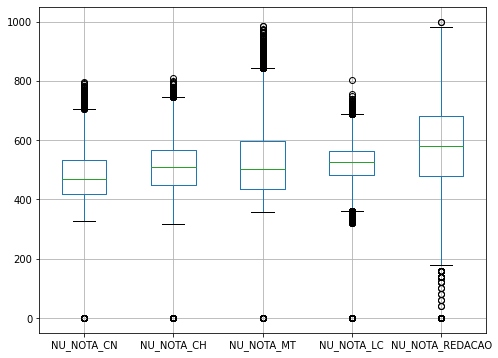

In [30]:
dados[provas].plot.box(grid = True, figsize = (8, 6))
# na redação as pessoas tiraram notas mais diferentes, percebemos isso porque a área do quadrado é maior.

**Desafio 06: Explorar a documentações e visualizações com matplotlib ou pandas e gerar novas visualizações.**
Algumas novas visões são apresentadas juntos dos desafios anteriores. Agora olhando mais profundamente ao nosso dicionário de dados, temos:

Proporção de homens e mulheres inscritos no Enem:

In [31]:
dados_sexo = dados['TP_SEXO'].value_counts()
dados_totais = len(dados['TP_SEXO'])
dados_sexo_porcentagem = (dados_sexo/dados_totais)*100

df_dados_sexo = pd.DataFrame()
df_dados_sexo['Sexo'] = dados_sexo.index
df_dados_sexo['Total'] = dados_sexo.values
df_dados_sexo['Proporção (%)'] = dados_sexo_porcentagem.values
df_dados_sexo

,Sexo,Total,Proporção (%)
0,F,75883,59.572146
1,M,51497,40.427854


In [32]:
dados_raca = dados['TP_COR_RACA'].value_counts()
dados_raca

3    59132
1    45616
2    16300
4     2975
0     2565
5      792
Name: TP_COR_RACA, dtype: int64

In [33]:
dados_raca_sexo = dados[['TP_SEXO','TP_COR_RACA']]
dados_raca_sexo.value_counts()

TP_SEXO  TP_COR_RACA
F        3              35961
         1              26572
M        3              23171
         1              19044
F        2               9419
M        2               6881
F        4               2044
         0               1426
M        0               1139
         4                931
F        5                461
M        5                331
dtype: int64

In [34]:
def definir_sexo(num):
    if num == 0:
      return 'Não declarado'
    elif num == 1:
      return 'Branca'
    elif num == 2:
      return 'Preta'
    elif num == 3:
      return 'Parda'
    elif num == 4:
      return 'Amarela'
    elif num == 5:
      return 'Indígena'

In [35]:
dados_raca_sexo['DSC_RACA'] = dados_raca_sexo['TP_COR_RACA'].map(definir_sexo)
dados_raca_sexo

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TP_SEXO,TP_COR_RACA,DSC_RACA
0,M,3,Parda
1,M,3,Parda
2,F,1,Branca
3,F,3,Parda
4,F,3,Parda
...,...,...,...
127375,F,1,Branca
127376,M,2,Preta
127377,F,3,Parda
127378,F,2,Preta


In [36]:
dados_raca_sexo.drop('TP_COR_RACA', axis=1, inplace= True)
dados_raca_sexo.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


TP_SEXO  DSC_RACA     
F        Parda            35961
         Branca           26572
M        Parda            23171
         Branca           19044
F        Preta             9419
M        Preta             6881
F        Amarela           2044
         Não declarado     1426
M        Não declarado     1139
         Amarela            931
F        Indígena           461
M        Indígena           331
dtype: int64

In [37]:
total_inscritos = len(dados["TP_COR_RACA"])
dados_raca = dados_raca_sexo.value_counts()

proporcao_inscritos_raca = (dados_raca/total_inscritos).mul(100)
proporcao_inscritos_raca

TP_SEXO  DSC_RACA     
F        Parda            28.231276
         Branca           20.860418
M        Parda            18.190454
         Branca           14.950542
F        Preta             7.394410
M        Preta             5.401947
F        Amarela           1.604648
         Não declarado     1.119485
M        Não declarado     0.894175
         Amarela           0.730884
F        Indígena          0.361909
M        Indígena          0.259852
dtype: float64

In [38]:
nao_declarados = dados_raca_sexo.query('DSC_RACA == "Não declarado"')['TP_SEXO'].value_counts()
brancos = dados_raca_sexo.query('DSC_RACA == "Branca"')['TP_SEXO'].value_counts()
pretos = dados_raca_sexo.query('DSC_RACA == "Preta"')['TP_SEXO'].value_counts()
pardos = dados_raca_sexo.query('DSC_RACA == "Parda"')['TP_SEXO'].value_counts()
amarelos = dados_raca_sexo.query('DSC_RACA == "Amarela"')['TP_SEXO'].value_counts()
indigenas = dados_raca_sexo.query('DSC_RACA == "Indígena"')['TP_SEXO'].value_counts()

In [39]:
index = dados_raca_sexo['TP_SEXO'].unique()

df_dados_raca_sexo = pd.DataFrame({'Não declarado': nao_declarados,
                               'Brancas' :brancos,
                               'Pretas' : pretos,
                               'Pardas': pardos,
                               'Amarelas': amarelos,
                               'Indígenas': indigenas},
                               index = index
                               )
df_dados_raca_sexo.columns.name = 'Sexo' 
df_dados_raca_sexo

Sexo,Não declarado,Brancas,Pretas,Pardas,Amarelas,Indígenas
M,1139,19044,6881,23171,931,331
F,1426,26572,9419,35961,2044,461


Text(0.5, 1.0, 'Quantidade de inscritos por raca e gênero')

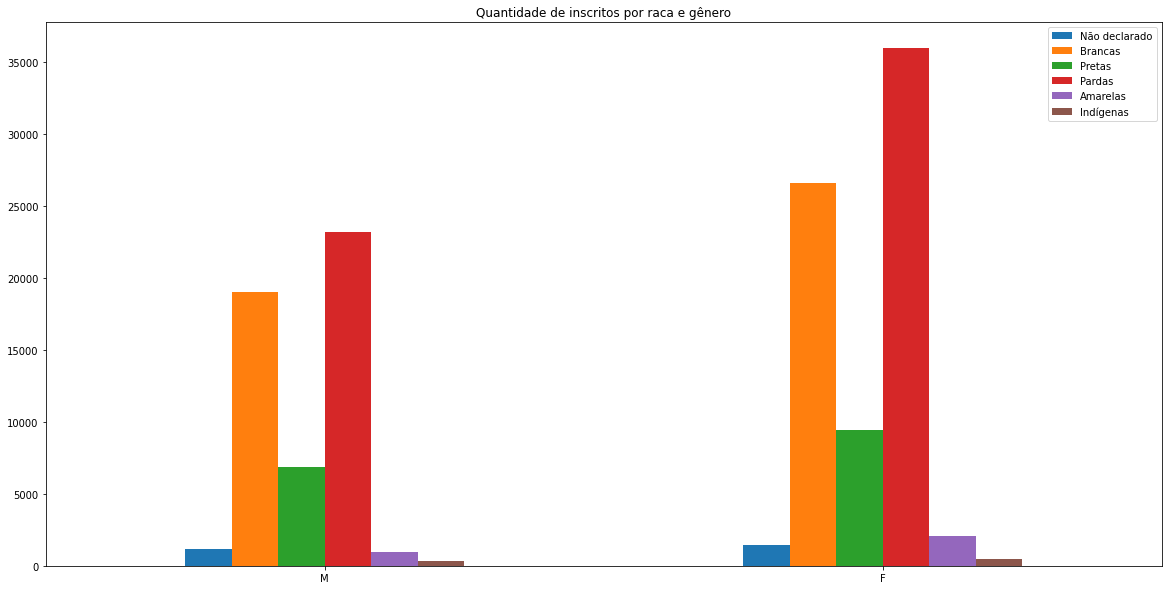

In [40]:
df_dados_raca_sexo.columns.name = ''
fig = df_dados_raca_sexo.plot.bar(rot=0, figsize = (20,10))
plt.title("Quantidade de inscritos por raca e gênero")